## Theory behind Reparameterization Trick - somemore additions to the original version by Goker Erdogan

Here we will understand the reparameterization trick used by Kingma and Welling (2014) to train their variational autoencoder.  

Assume we have a normal distribution $q$ that is parameterized by $\theta$, specifically $q_{\theta}(x) = N(\theta,1)$. We want to solve the below problem
$$
\text{min}_{\theta} \quad E_q[x^2]
$$
This is of course a rather silly problem and the optimal $\theta$ is obvious. We want to understand how the reparameterization trick helps in calculating the gradient of this objective $E_q[x^2]$.

What is the expected value of $E_q[x^2]$ ?
<br> It is nothing but variance + (mean)^2. Therefore, in this case, it is $\theta^2$ + 1 

One way to calculate $\nabla_{\theta} E_q[x^2]$ is as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} \int q_{\theta}(x) x^2 dx = \int x^2 \nabla_{\theta} q_{\theta}(x) \frac{q_{\theta}(x)}{q_{\theta}(x)} dx = \int q_{\theta}(x) \nabla_{\theta} \log q_{\theta}(x) x^2 dx = E_q[x^2 \nabla_{\theta} \log q_{\theta}(x)]
$$

For our example where $q_{\theta}(x) = N(\theta,1)$, this method gives
$$
\nabla_{\theta} E_q[x^2] = E_q[x^2 (x-\theta)]
$$

 What is the variance of $E_q[x^2 (x-\theta)]$ in this case? <br>
It can be found using some complicated, yet straightforward math. $Var(\mu^2 \epsilon + 2\mu \epsilon^2 + \epsilon^3) \le \mu^4Var(\epsilon) \le \mu^4$ <br>
Therefore, variance of the sample mean of $E_q[x^2 (x-\theta)]$ will be at least $\frac{\mu^4}{\sqrt{n}}.  $ We can indeed verify that this variance increases with $\mu$. Note that the pathwise gradient does not have this problem.


Reparameterization trick is a way to rewrite the expectation so that the distribution with respect to which we take the expectation is independent of parameter $\theta$. To achieve this, we need to make the stochastic element in $q$ independent of $\theta$. Hence, we write $x$ as
$$
x = \theta + \epsilon, \quad \epsilon \sim N(0,1)
$$
Then, we can write 
$$
E_q[x^2] = E_p[(\theta+\epsilon)^2]
$$ 
where $p$ is the distribution of $\epsilon$, i.e., $N(0,1)$. Now we can write the derivative of $E_q[x^2]$ as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} E_p[(\theta+\epsilon)^2] = E_p[2(\theta+\epsilon)]
$$

In the above case, it is easy to note that the sample mean will have a variance of $\frac{4}{\sqrt{n}}$,which looks independent of $\mu$.

Now let us compare the variances of the two methods; we are hoping to see that the first method has high variance while reparameterization trick decreases the variance substantially.

### With mean = 2

In [1]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))

3.95569048662
3.9150255039


Let us plot the variance for different sample sizes.

In [2]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print()
print(vars1)
print(vars2)

[ 3.81095352  4.03655932  3.96279395  4.0045522   4.00203414]
[ 4.04018422  3.9878957   4.00037079  3.99667789  4.00066778]

[  1.32731049e+01   9.12063666e-01   8.03604324e-02   1.01701641e-02
   7.13464452e-04]
[  3.96371303e-01   3.66080170e-02   5.87655498e-03   3.65440156e-04
   3.89156655e-05]


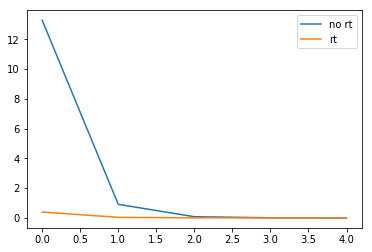

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])

### With Mean = 4

In [4]:
import numpy as np
N = 1000
theta = 4.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))

6.87862307368
7.9292520907


In [5]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print()
print(vars1)
print(vars2)

[ 8.26682027  7.82919365  7.99299786  7.97066258  8.00084004]
[ 8.04052111  7.99936387  7.9954101   7.99919523  8.00066903]

[  6.95956617e+01   6.44329020e+00   5.44355317e-01   3.08962462e-02
   7.23940750e-03]
[  4.18539528e-01   4.05795454e-02   4.69016086e-03   4.58622290e-04
   4.22305479e-05]


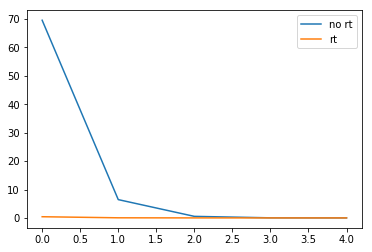

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])

Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!

Here are some additional resources I found interesting:

<ol>
  <li>Section 3.1 from [Yarin Gal's Thesis](http://mlg.eng.cam.ac.uk/yarin/thesis/thesis.pdf) contains a different and more rigorous derivation</li>
  <li>[Miller's blog](http://andymiller.github.io/2016/12/19/elbo-gradient-estimators.html) reconciles various estimators like score fucntion estimators, pathwise estimators, etc. It was here I came across the relation between Control variates in linear regression and variance reduction in pathwise estimators. Mind = Blown </li>
  <li> I am looking for a more rigorous formulation of the above relation between reparameterization trick and control variates in linear regression. If you have come across any, do let me know. you can mail me at kasa at the rate u dot nus.edu <li>
  
</ol>

In [7]:
import sys
print(sys.version)
import platform
print(platform.python_version())
print("The Python version is %s.%s.%s" % sys.version_info[:3])

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
3.6.1
The Python version is 3.6.1
